In [6]:
bag_name = '/home/ashamsah3/catkin_ws/src/digit_main/log_data_hw/_2022-12-21-15-13-28_0.bag'

bag_name_sim = '/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-19-16-02-25_0.bag'

bag_name_sim2 = '/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-20-12-24-41_0.bag'



In [7]:
import rosbag
import rospy

bag = rosbag.Bag(bag_name, 'r')

bag_sim = rosbag.Bag(bag_name_sim, 'r')

bag_sim2 = rosbag.Bag(bag_name_sim2, 'r')

topics = bag.get_type_and_topic_info()[1].keys()

topics_sim = bag_sim.get_type_and_topic_info()[1].keys()

topics_sim2 = bag_sim2.get_type_and_topic_info()[1].keys()
print(topics)

print(topics_sim)
# types = []
# for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
#     types.append(bag.get_type_and_topic_info()[1].values()[i][0])

dict_keys(['/digit_state'])
dict_keys(['/digit_state'])


In [8]:
# https://github.com/jmscslgroup/bagpy/blob/master/notebook/bagpy_example.ipynb
import bagpy # easy to use wrapper for rosbag
from bagpy import bagreader

b = bagreader(bag_name)
print(b.topic_table)

b_sim = bagreader(bag_name_sim)

b_sim2 = bagreader(bag_name_sim2)

/home/ashamsah3/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[INFO]  Data folder /home/ashamsah3/catkin_ws/src/digit_main/log_data_hw/_2022-12-21-15-13-28_0 already exists. Not creating.
         Topics                  Types  Message Count     Frequency
0  /digit_state  digit_main/DigitState          86085  97541.953488
[INFO]  Data folder /home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-19-16-02-25_0 already exists. Not creating.
[INFO]  Data folder /home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-20-12-24-41_0 already exists. Not creating.


In [9]:
JOINT_MSG_PATH = b.message_by_topic(topic='/digit_state') # Export to csv file.
JOINT_MSG_PATH




'/home/ashamsah3/catkin_ws/src/digit_main/log_data_hw/_2022-12-21-15-13-28_0/digit_state.csv'

In [16]:
JOINT_MSG_PATH_SIM = b_sim.message_by_topic(topic='/digit_state')
JOINT_MSG_PATH_SIM

'/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-19-16-02-25_0/digit_state.csv'

In [17]:
JOINT_MSG_PATH_SIM2 = b_sim2.message_by_topic(topic='/digit_state')
JOINT_MSG_PATH_SIM2

'/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-20-12-24-41_0/digit_state.csv'

In [18]:
import pandas as pd
import numpy as np
veldf = pd.read_csv(JOINT_MSG_PATH)
veldf;

veldf_sim = pd.read_csv(JOINT_MSG_PATH_SIM)
veldf_sim;

# veldf_sim2 = pd.read_csv(JOINT_MSG_PATH_SIM2)
# veldf_sim2;

/tmp/ipykernel_247026/3350451116.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('hardware_com.svg')
/home/ashamsah3/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


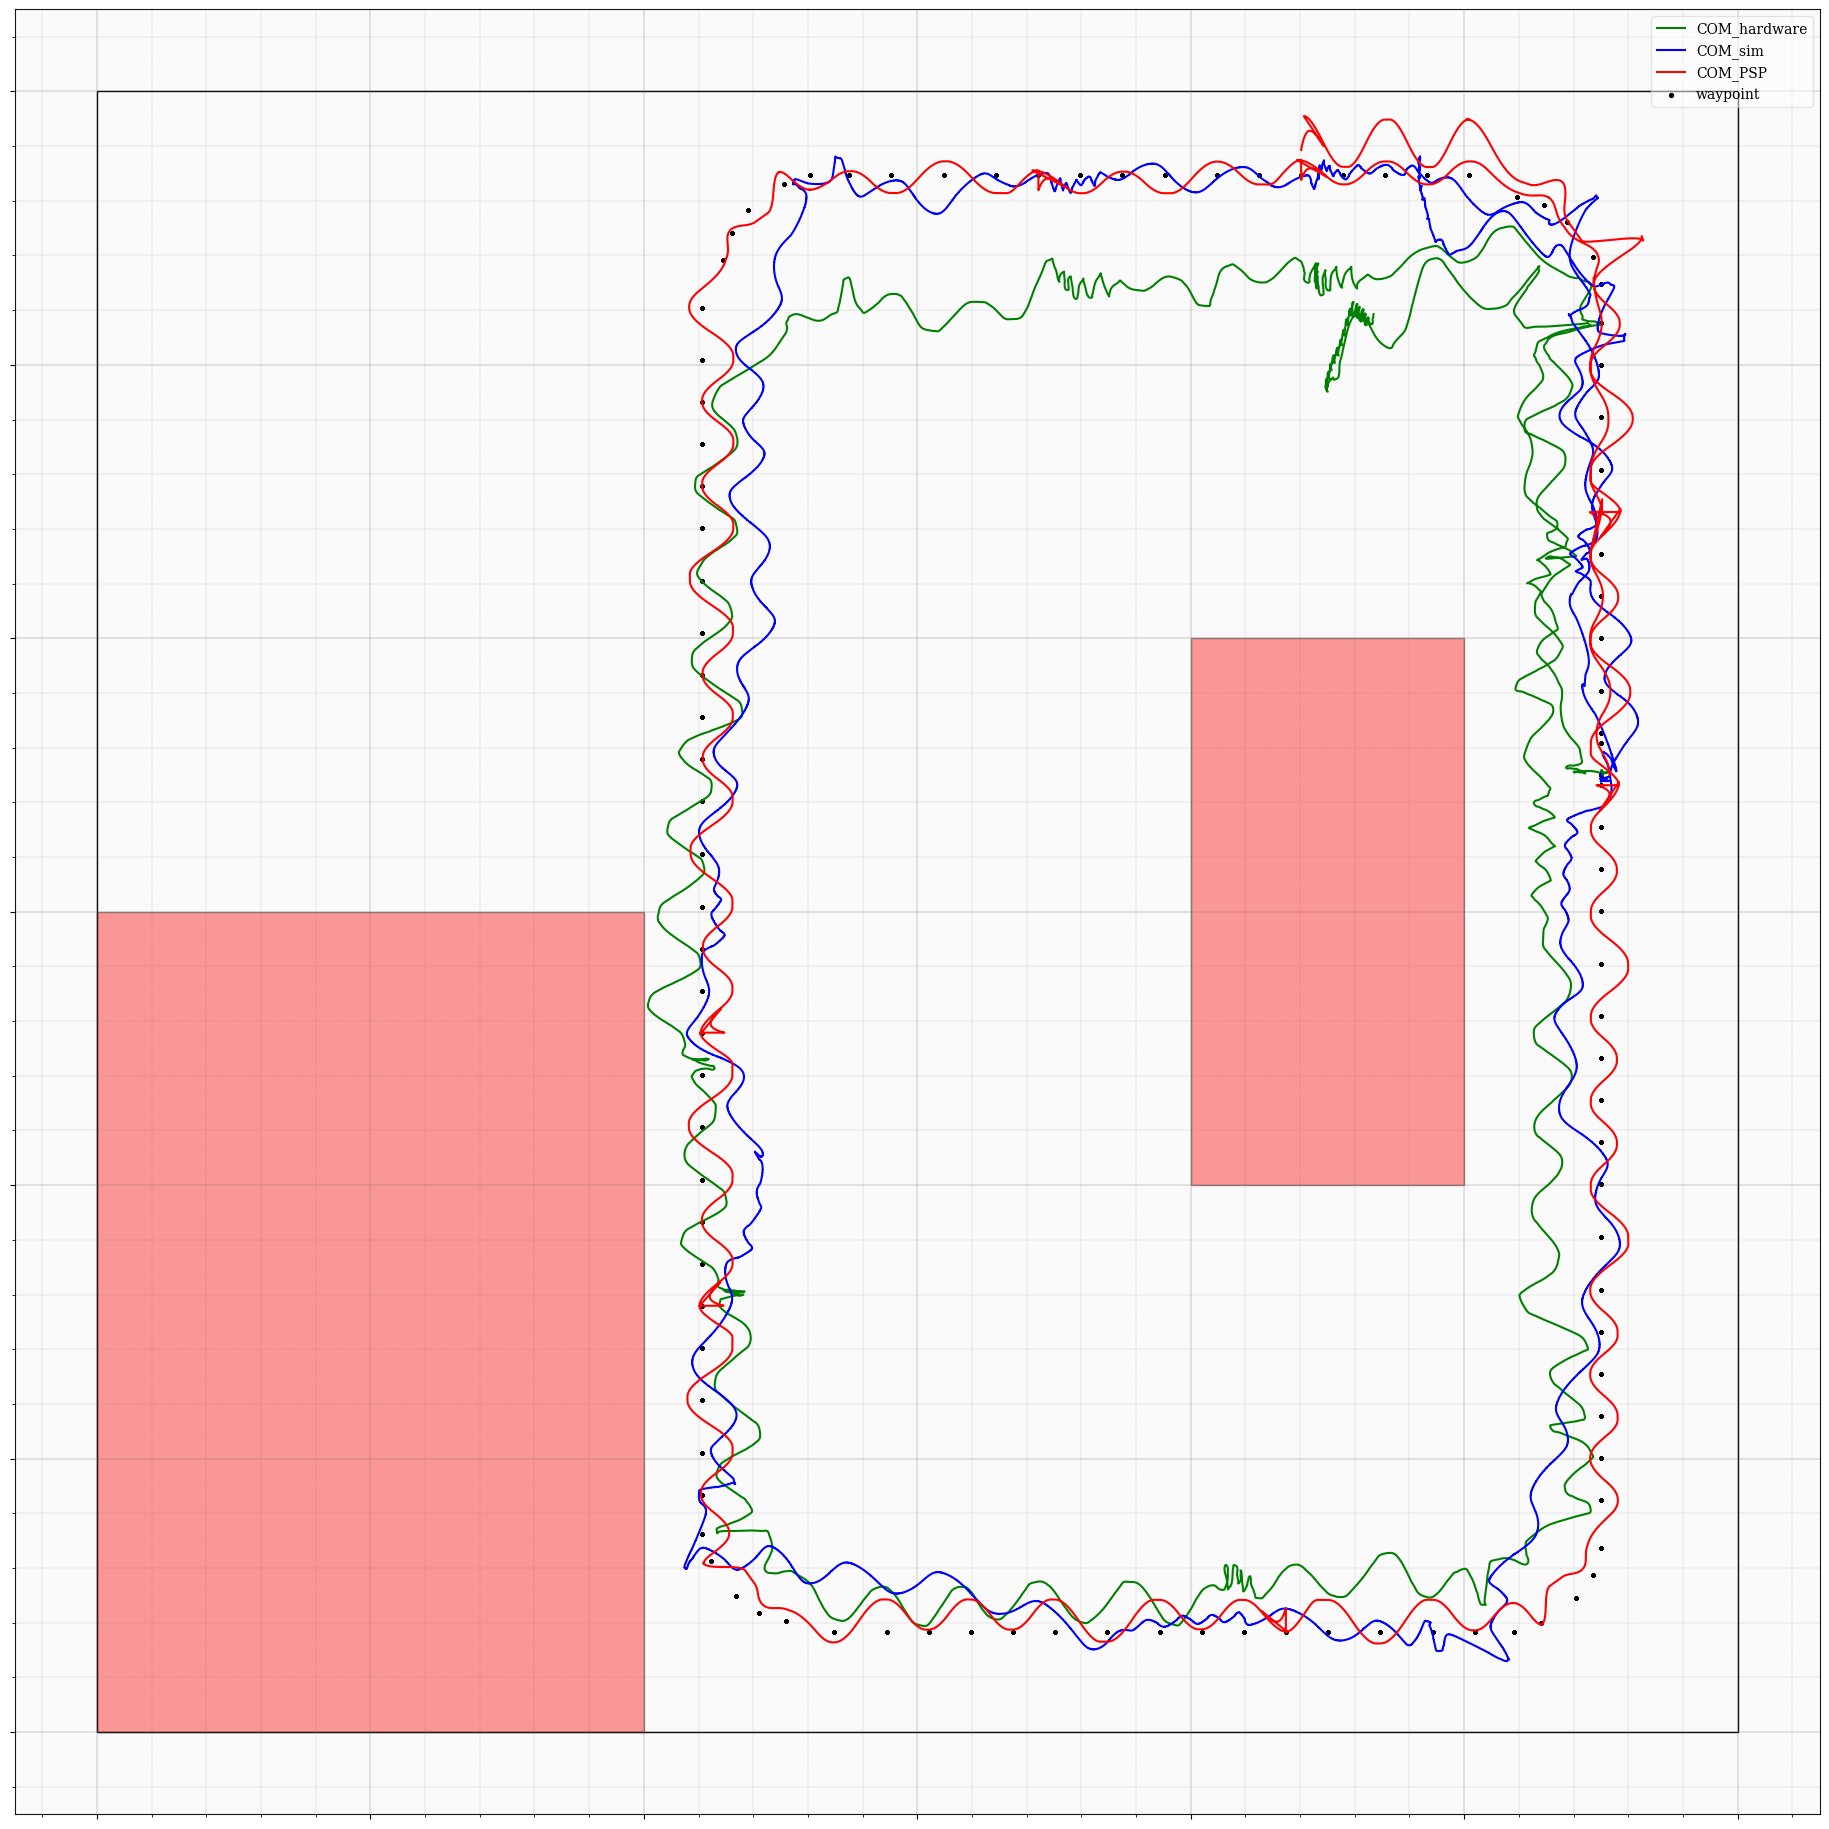

In [51]:
# CoM

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle
fig, ax = bagpy.create_fig(1)
from turtle import color
log_COM = np.loadtxt('/home/ashamsah3/catkin_ws/src/digit_main/src/config_files/log_ROM_COM_belief_with_switch1.txt')
log_x_com = log_COM[:,0]
log_y_com = log_COM[:,1]


fig.set_size_inches(20, 20)

border = Rectangle((0,0), 6, 6, fc = "None", ec="black" )
# border2 = Rectangle((-1,-1), 8, 8, fc = "None", ec="black" )
s_obs1 = Rectangle((0,0), 2, 3, fc = "red", ec="black", alpha = 0.4 )
s_obs2 = Rectangle((4, 2), 1, 2, fc = "red", ec="black" , alpha = 0.4)
# s_obs3 = Rectangle((-1, -1), 8, 1, fc = "red", ec="black" , alpha = 1)
# s_obs4 = Rectangle((-1, -1), 1, 8, fc = "red", ec="black" , alpha = 1)
# ax[0].add_patch(s_obs4)
ax[0].add_patch(border)
# ax[0].add_patch(border2)
ax[0].add_patch(s_obs1)
ax[0].add_patch(s_obs2)
# ax[0].add_patch(s_obs3)

shift_y = 3 - 0.19 #(veldf['waypoint_1'][10500]) + (veldf['waypoint_1'][10])
shift_x = 5.5 - 0.04#(veldf['waypoint_0'][10500]) - (veldf['waypoint_0'][10])


heading_offset = -np.pi/2 + veldf['base_orientation_2'][0]
# print(heading_offset)
# ax[0].plot((veldf['p_WC_0']*np.cos(veldf['base_orientation_2'][0]) + veldf['p_WC_1']*np.sin(veldf['base_orientation_2'][0])) + shift_x , 
#     -veldf['p_WC_0']*np.sin(veldf['base_orientation_2'][0]) + veldf['p_WC_1']*np.cos(veldf['base_orientation_2'][0])  + shift_y  , color='blue', label = 'COM');

ax[0].plot(((veldf['p_WC_0'] )*np.cos(heading_offset) + (veldf['p_WC_1'])*np.sin(heading_offset)) + shift_x,  
    -(veldf['p_WC_0'])*np.sin(heading_offset) + (veldf['p_WC_1'])*np.cos(heading_offset) +shift_y, color='green', label = 'COM_hardware');

ax[0].plot((veldf_sim['p_WC_0'] ), (veldf_sim['p_WC_1']),   color='blue', label = 'COM_sim');

# ax[0].plot((veldf_sim2['p_WC_0'] ), (veldf_sim2['p_WC_1']),   color='orange', label = 'Perfect state');
# ax[0].scatter(veldf['waypoint_0'][11000:86085]*np.cos(veldf['base_orientation_2'][0]) + veldf['waypoint_1'][11000:86085]*np.sin(veldf['base_orientation_2'][0]) + shift_x , 
#     -veldf['waypoint_0'][11000:86085]*np.sin(veldf['base_orientation_2'][0]) + veldf['waypoint_1'][11000:86085]*np.cos(veldf['base_orientation_2'][0]) + shift_y, color='black', label = 'waypoint');

ax[0].scatter(veldf['waypointPSP_0'][11000:86085], veldf['waypointPSP_1'][11000:86085], s=2,  color='black', label = 'waypoint');

ax[0].plot(log_x_com,log_y_com, color='red', label = 'COM_PSP')
# print((((veldf['p_WC_0'] )*np.cos(heading_offset) + (veldf['p_WC_1'])*np.sin(heading_offset)) + shift_x)[0])
# print((-(veldf['p_WC_0'])*np.sin(heading_offset) + (veldf['p_WC_1'])*np.cos(heading_offset) +shift_y)[0])

ax[0].set_aspect(1)

# # plt.ylabel('m')
# plt.xlabel('Time [s]')
# plt.title('y_COM')
ax[0].grid(True)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
plt.legend()
plt.savefig('hardware_com.svg')

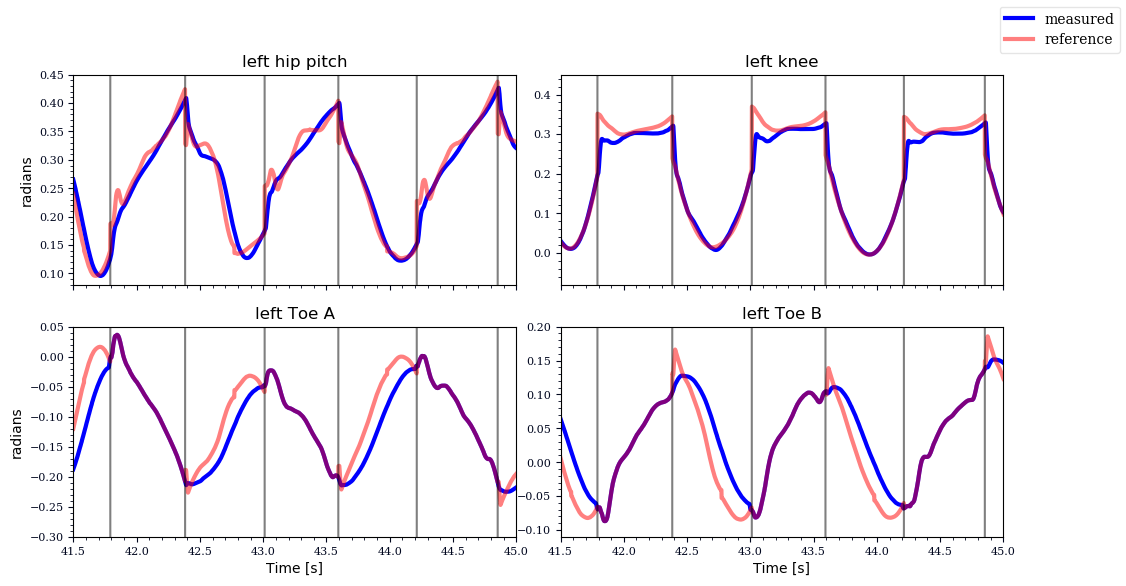

In [209]:
#left leg joints
fig, axs = plt.subplots(2, 2, sharex=True)
fig.subplots_adjust(hspace=0.2, wspace = 0.1)
# interval = [32000:35000]
csfont = {'fontname':'Times New Roman'}
start = 32000
finish = 35000
axs[0, 0].plot(veldf['time_elapsed'][start:finish], veldf['position_full_2'][start:finish], color='blue', label = 'measured', linewidth = 3);
axs[0, 0].plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_2'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
axs[0, 0].plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
axs[0,0].set_ylim([0.08,0.45])
axs[0,0].set_xlim([41.5,45])

axs[0, 0].set_title('left hip pitch', **csfont, fontsize=12)
axs[0, 0].set_ylabel('radians', **csfont, fontsize=10)

axs[0, 1].plot(veldf['time_elapsed'][start:finish], veldf['position_full_3'][start:finish], color='blue', label = 'measured', linewidth = 3);
axs[0, 1].plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_3'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
axs[0,1].plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
axs[0,1].set_ylim([-0.08,0.45])
axs[0, 1].set_title('left knee', **csfont,fontsize=12)

axs[1, 0].plot(veldf['time_elapsed'][start:finish], veldf['position_full_4'][start:finish], color='blue', label = 'measured', linewidth = 3);
axs[1, 0].plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_4'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
axs[1,0].plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
axs[1,0].set_ylim([-0.3,0.05])
axs[1, 0].set_title('left Toe A',**csfont, fontsize=12)
axs[1, 0].set_xlabel('Time [s]',**csfont, fontsize=10)

axs[1, 1].plot(veldf['time_elapsed'][start:finish], veldf['position_full_5'][start:finish], color='blue', label = 'measured', linewidth = 3);
axs[1, 1].plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_5'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
axs[1,1].plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
axs[1,1].set_ylim([-0.11,0.2])
axs[1, 1].set_title('left Toe B',**csfont, fontsize=12)
axs[1, 1].set_xlabel('Time [s]',**csfont, fontsize=10)
axs[1, 0].set_ylabel('radians',**csfont, fontsize=10)



for ax in axs.flat:
   ax.tick_params(axis='both', which='major', labelsize=8)
   handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper right')

Text(0.5, 1, 'x_COM')

/home/ashamsah3/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


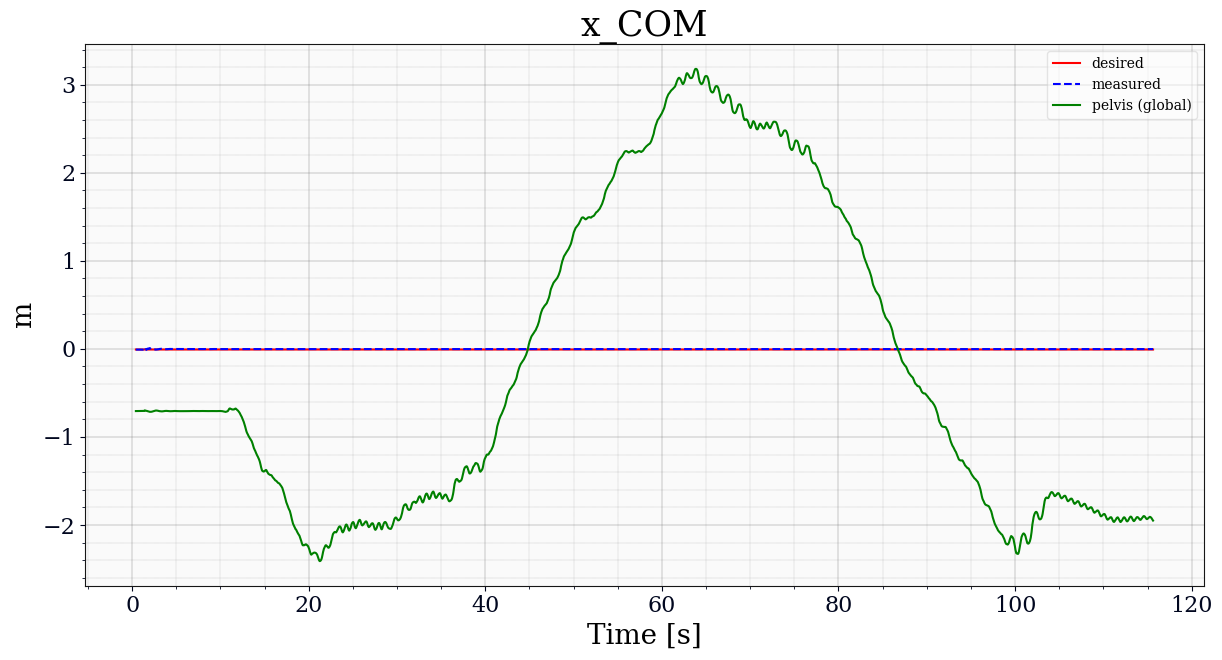

In [7]:
# x COM
fig, ax = bagpy.create_fig(1)
ax[0].plot(veldf['time_elapsed'], veldf['p_MC_M_d_0'], color='red', label = 'desired');
ax[0].plot(veldf['time_elapsed'],veldf['p_MC_M_0'], color='blue',linestyle='--', label = 'measured');
ax[0].plot(veldf['time_elapsed'],veldf['base_position_0'], color='green', label = 'pelvis (global)');
plt.legend()
plt.ylabel('m')
plt.xlabel('Time [s]')
plt.title('x_COM')

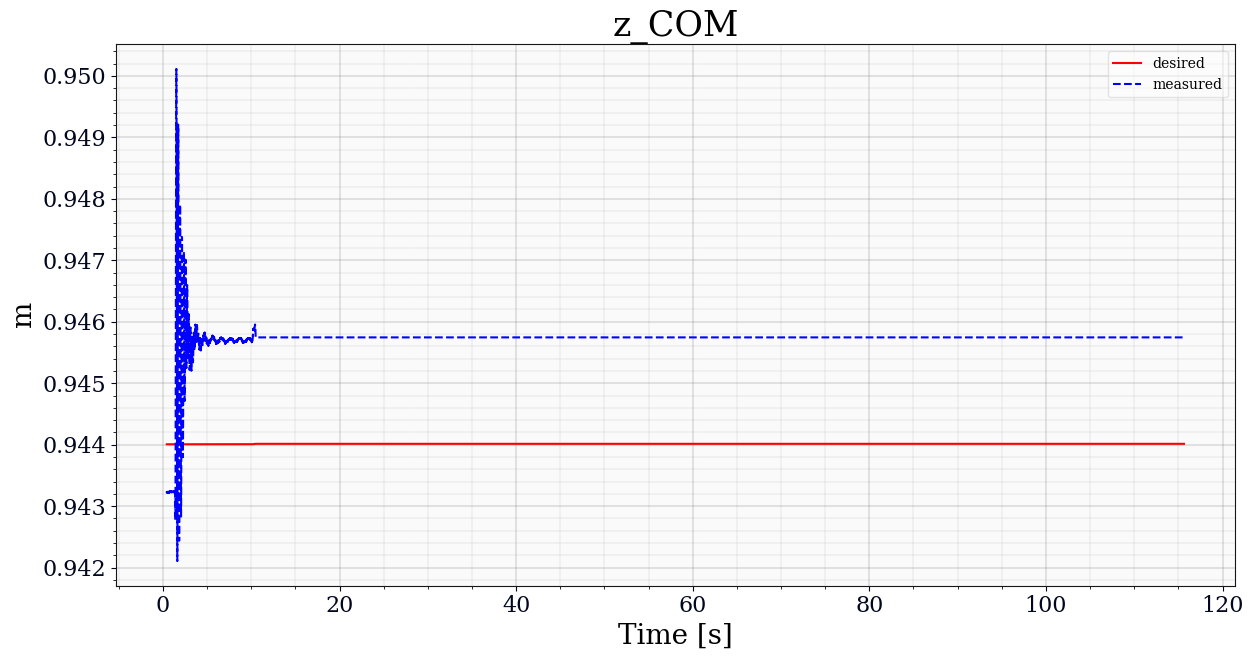

In [34]:
# Z COM
fig, ax = bagpy.create_fig(1)
from turtle import color
ax[0].plot(veldf['time_elapsed'], veldf['p_MC_M_d_2'], color='red', label = 'desired');
ax[0].plot(veldf['time_elapsed'],veldf['p_MC_M_2'], color='blue',linestyle='--', label = 'measured');
plt.ylabel('m')
plt.xlabel('Time [s]')
plt.title('z_COM')
plt.legend()

/home/ashamsah3/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


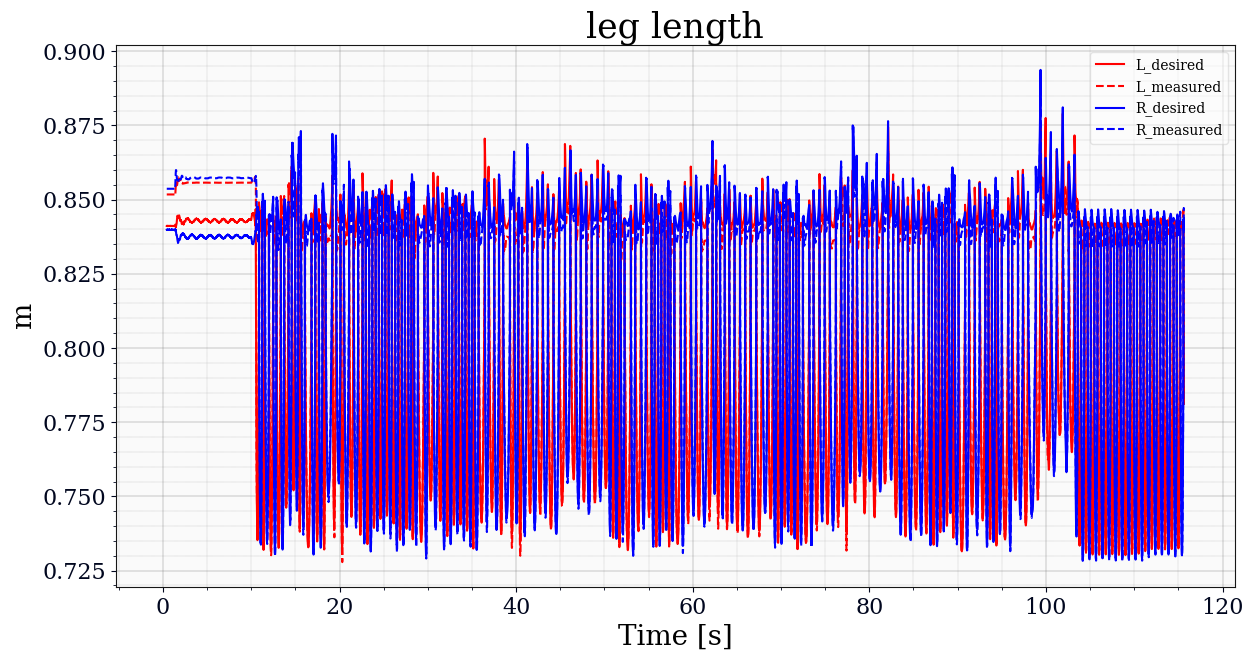

In [35]:
# leg lengths
fig, ax = bagpy.create_fig(1)
from turtle import color
ax[0].plot(veldf['time_elapsed'], veldf['leg_length_0'], color='red', label = 'L_desired');
ax[0].plot(veldf['time_elapsed'],veldf['leg_length_2'], color='red',linestyle='--', label = 'L_measured');
ax[0].plot(veldf['time_elapsed'], veldf['leg_length_1'], color='blue', label = 'R_desired');
ax[0].plot(veldf['time_elapsed'],veldf['leg_length_3'], color[32000:35000]='blue',linestyle='--', label = 'R_measured');
plt.ylabel('m')
plt.xlabel('Time [s]')
plt.title('leg length')
plt.legend()

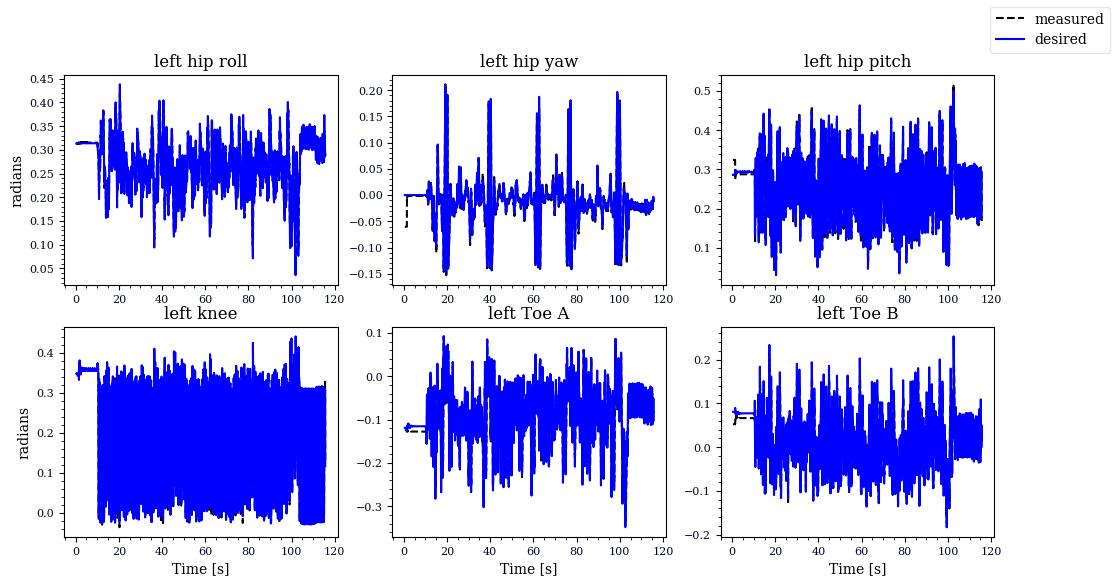

In [14]:
#left leg joints
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(veldf['time_elapsed'], veldf['position_full_0'], color='black', linestyle = '--', label = 'measured');
axs[0, 0].plot(veldf['time_elapsed'], veldf['pos_reference_0'], color='blue', label = 'desired');
axs[0, 0].set_title('left hip roll', fontsize=12)
axs[0, 0].set_ylabel('radians', fontsize=10)
axs[0, 1].plot(veldf['time_elapsed'], veldf['position_full_1'], color='black', linestyle = '--', label = 'measured');
axs[0, 1].plot(veldf['time_elapsed'], veldf['pos_reference_1'], color='blue', label = 'desired');
axs[0, 1].set_title('left hip yaw', fontsize=12)
axs[0, 2].plot(veldf['time_elapsed'], veldf['position_full_2'], color='black', linestyle = '--', label = 'measured');
axs[0, 2].plot(veldf['time_elapsed'], veldf['pos_reference_2'], color='blue', label = 'desired');
axs[0, 2].set_title('left hip pitch', fontsize=12)
axs[1, 0].plot(veldf['time_elapsed'], veldf['position_full_3'], color='black', linestyle = '--', label = 'measured');
axs[1, 0].plot(veldf['time_elapsed'], veldf['pos_reference_3'], color='blue', label = 'desired');
axs[1, 0].set_title('left knee', fontsize=12)
axs[1, 0].set_ylabel('radians', fontsize=10)
axs[1, 0].set_xlabel('Time [s]', fontsize=10)[32000:35000]
axs[1, 1].plot(veldf['time_elapsed'], veldf['position_full_4'], color='black', linestyle = '--', label = 'measured');
axs[1, 1].plot(veldf['time_elapsed'], veldf['pos_reference_4'], color='blue', label = 'desired');
axs[1, 1].set_title('left Toe A', fontsize=12)
axs[1, 1].set_xlabel('Time [s]', fontsize=10)
axs[1, 2].plot(veldf['time_elapsed'], veldf['position_full_5'], color='black', linestyle = '--', label = 'measured');
axs[1, 2].plot(veldf['time_elapsed'], veldf['pos_reference_5'], color='blue', label = 'desired');
axs[1, 2].set_title('left Toe B', fontsize=12)
axs[1, 2].set_xlabel('Time [s]', fontsize=10)



for ax in axs.flat:
   ax.tick_params(axis='both', which='major', labelsize=8)
   handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper right')

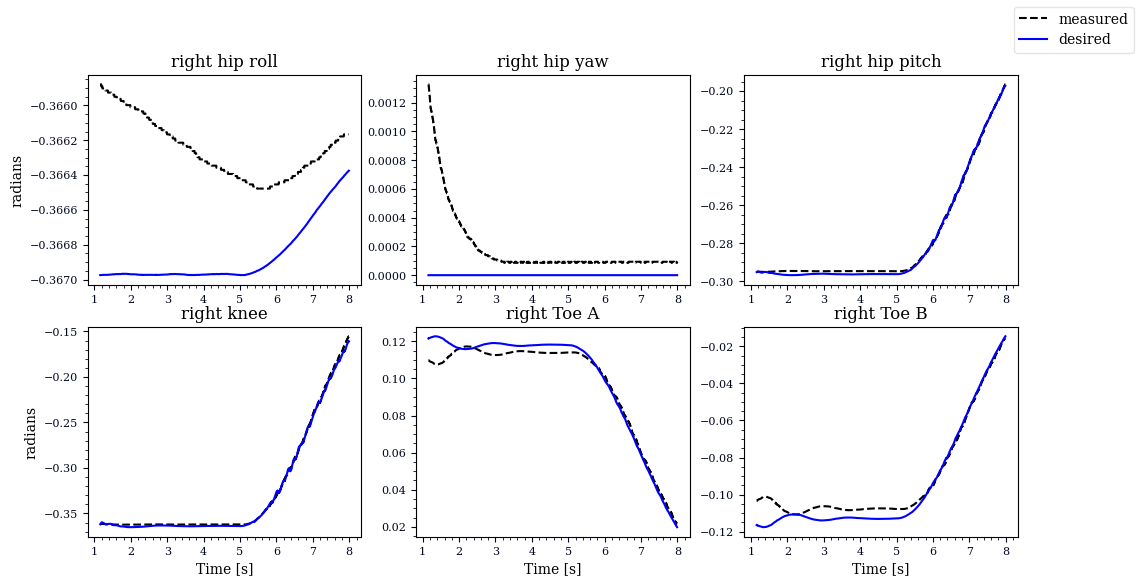

In [26]:
#Right leg joints
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(veldf['time_elapsed'], veldf['position_full_6'], color='black', linestyle = '--', label = 'measured');
axs[0, 0].plot(veldf['time_elapsed'], veldf['pos_reference_6'], color='blue', label = 'desired');
axs[0, 0].set_title('right hip roll', fontsize=12)
axs[0, 0].set_ylabel('radians', fontsize=10)
axs[0, 1].plot(veldf['time_elapsed'], veldf['position_full_7'], color='black', linestyle = '--', label = 'measured');
axs[0, 1].plot(veldf['time_elapsed'], veldf['pos_reference_7'], color='blue', label = 'desired');
axs[0, 1].set_title('right hip yaw', fontsize=12)
axs[0, 2].plot(veldf['time_elapsed'], veldf['position_full_8'], color='black', linestyle = '--', label = 'measured');
axs[0, 2].plot(veldf['time_elapsed'], veldf['pos_reference_8'], color='blue', label = 'desired');
axs[0, 2].set_title('right hip pitch', fontsize=12)
axs[1, 0].plot(veldf['time_elapsed'], veldf['position_full_9'], color='black', linestyle = '--', label = 'measured');
axs[1, 0].plot(veldf['time_elapsed'], veldf['pos_reference_9'], color='blue', label = 'desired');
axs[1, 0].set_title('right knee', fontsize=12)
axs[1, 0].set_ylabel('radians', fontsize=10)
axs[1, 0].set_xlabel('Time [s]', fontsize=10)
axs[1, 1].plot(veldf['time_elapsed'], veldf['position_full_10'], color='black', linestyle = '--', label = 'measured');
axs[1, 1].plot(veldf['time_elapsed'], veldf['pos_reference_10'], color='blue', label = 'desired');
axs[1, 1].set_title('right Toe A', fontsize=12)
axs[1, 1].set_xlabel('Time [s]', fontsize=10)
axs[1, 2].plot(veldf['time_elapsed'], veldf['position_full_11'], color='black', linestyle = '--', label = 'measured');
axs[1, 2].plot(veldf['time_elapsed'], veldf['pos_reference_11'], color='blue', label = 'desired');
axs[1, 2].set_title('right Toe B', fontsize=12)
axs[1, 2].set_xlabel('Time [s]', fontsize=10)



for ax in axs.flat:
   ax.tick_params(axis='both', which='major', labelsize=8)
   handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper right')

Text(0.5, 0, 'Time [s]')

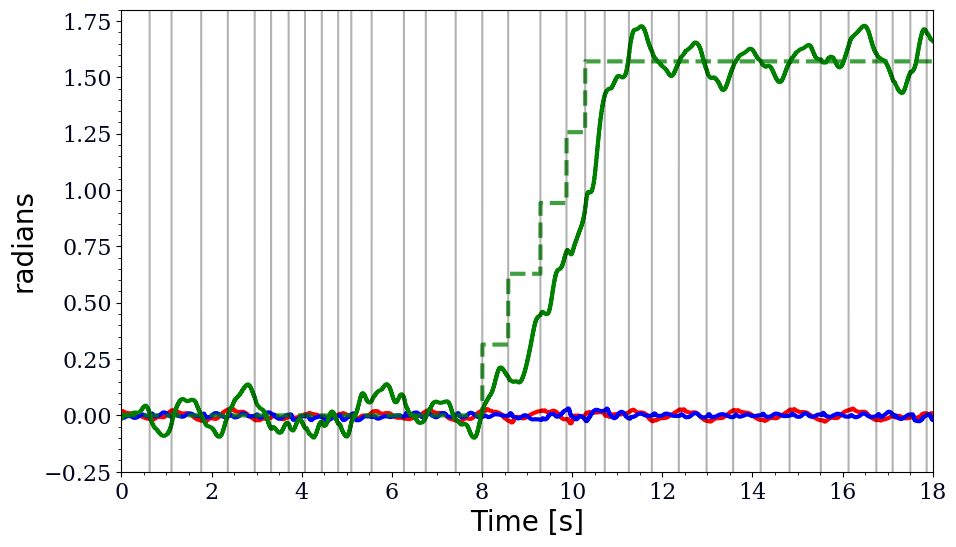

In [124]:
# Rpy
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
from turtle import color
csfont = {'fontname':'Times New Roman'}
from turtle import color

start = 40000
finish = 56000
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_0'][start:finish], color='red',linewidth = 3, label = 'roll');
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start],veldf['base_orientation_1'][start:finish], color='blue',linewidth = 3, label = 'pitch');
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 3, color='green', label = 'yaw');
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);

# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['base_orientation_2'][0],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);

ax.set_ylim([-0.25,1.8])
ax.set_xlim([0,18])
ax.set_aspect(5)


plt.ylabel('radians',**csfont)
plt.xlabel('Time [s]', **csfont)
# plt.title('RPY')
# plt.legend()

AttributeError: 'AxesSubplot' object has no attribute 'sharex'

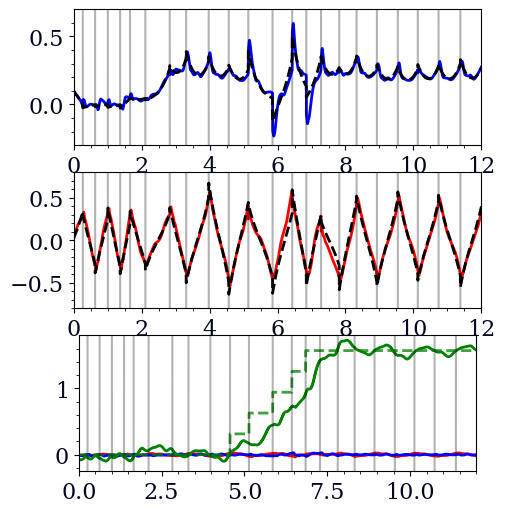

In [152]:
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
csfont = {'fontname':'Times New Roman'}
from turtle import color
start = 42500
finish = 52000
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_LIP_d_0'][32000:50000], color='black', linestyle = '--', linewidth = 3);
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_Wpc_L_0'][32000:50000], color='blue', label = 'measured', linewidth = 3);
# ax.plot(veldf['time_elapsed'][20000:50000]+0.4, veldf['target_vel_0'][20000:50000], color='black', label = 'measured', linewidth = 2);
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_0'][start:finish], color='blue', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_0'][start:finish], color='black', linestyle = '--', linewidth = 2);

ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_1'][start:finish], color='red', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_1'][start:finish], color='black', linestyle = '--', linewidth = 2);




ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_0'][start:finish], color='red',linewidth = 2, label = 'roll');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start],veldf['base_orientation_1'][start:finish], color='blue',linewidth = 2, label = 'pitch');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 2, color='green', label = 'yaw');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 2, linestyle = '--', label = 'target yaw', alpha = 0.75);

# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['base_orientation_2'][0],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax.set_ylim([-0.3,0.7])
ax2.set_ylim([-0.8,0.8])
ax3.set_ylim([-0.25,1.8])

ax.set_xlim([0,12])
ax2.set_xlim([0,12])
ax3.set_xlim([0,12])

ax.set_aspect(4)
ax2.set_aspect(2.5)
ax3.set_aspect(2)


# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);


Text(0.5, 0, 'Time [s]')

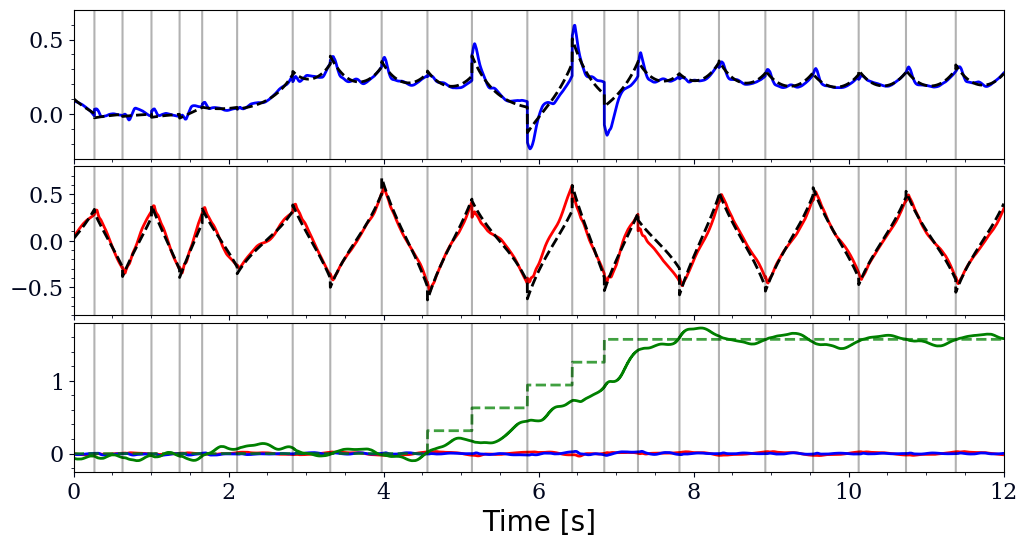

In [173]:
fig, axs = plt.subplots(3, 1, sharex=True,)
fig.subplots_adjust(hspace=0.05)
csfont = {'fontname':'Times New Roman'}
from turtle import color
start = 42500
finish = 52000
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_LIP_d_0'][32000:50000], color='black', linestyle = '--', linewidth = 3);
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_Wpc_L_0'][32000:50000], color='blue', label = 'measured', linewidth = 3);
# ax.plot(veldf['time_elapsed'][20000:50000]+0.4, veldf['target_vel_0'][20000:50000], color='black', label = 'measured', linewidth = 2);
axs[0].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_0'][start:finish], color='blue', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
axs[0].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_0'][start:finish], color='black', linestyle = '--', linewidth = 2);

axs[1].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_1'][start:finish], color='red', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
axs[1].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_1'][start:finish], color='black', linestyle = '--', linewidth = 2);




axs[2].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_0'][start:finish], color='red',linewidth = 2, label = 'roll');
axs[2].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start],veldf['base_orientation_1'][start:finish], color='blue',linewidth = 2, label = 'pitch');
axs[2].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 2, color='green', label = 'yaw');
axs[2].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 2, linestyle = '--', label = 'target yaw', alpha = 0.75);

# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['base_orientation_2'][0],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);
axs[2].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
axs[1].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
axs[0].plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);

axs[0].set_ylim([-0.3,0.7])
axs[1].set_ylim([-0.8,0.8])
axs[2].set_ylim([-0.25,1.8])
axs[0].set_xlim([0,12])

axs[2].set_xlabel('Time [s]', **csfont)


# ax.set_aspect(4)
# ax2.set_aspect(2.5)
# ax3.set_aspect(2)


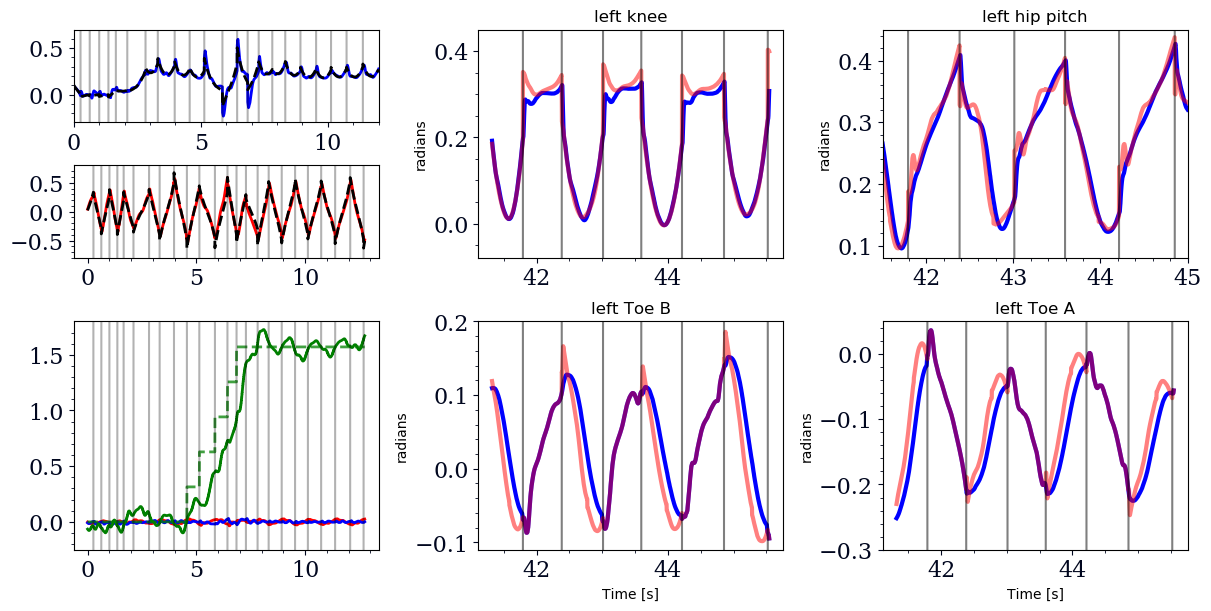

In [246]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


# def format_axes(fig):
#     for i, ax in enumerate(fig.axes):
        # ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        # ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True)

gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2:4, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax4 = fig.add_subplot(gs[0:2, 2])
ax5 = fig.add_subplot(gs[0:2, 1])
ax6 = fig.add_subplot(gs[2:4, 2])
ax7 = fig.add_subplot(gs[2:4, 1])

start = 42500
finish = 52000
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_LIP_d_0'][32000:50000], color='black', linestyle = '--', linewidth = 3);
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_Wpc_L_0'][32000:50000], color='blue', label = 'measured', linewidth = 3);
# ax.plot(veldf['time_elapsed'][20000:50000]+0.4, veldf['target_vel_0'][20000:50000], color='black', label = 'measured', linewidth = 2);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_0'][start:finish], color='blue', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_0'][start:finish], color='black', linestyle = '--', linewidth = 2);

ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_1'][start:finish], color='red', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_1'][start:finish], color='black', linestyle = '--', linewidth = 2);




ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_0'][start:finish], color='red',linewidth = 2, label = 'roll');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start],veldf['base_orientation_1'][start:finish], color='blue',linewidth = 2, label = 'pitch');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 2, color='green', label = 'yaw');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 2, linestyle = '--', label = 'target yaw', alpha = 0.75);

# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['base_orientation_2'][0],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
# ax2.sharex(ax1)
# fig.suptitle("GridSpec")
ax1.set_ylim([-0.3,0.7])
ax2.set_ylim([-0.8,0.8])import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
ax3.set_ylim([-0.25,1.8])
ax1.set_xlim([0,12])
# format_axes(fig)


start = 32000
finish = 35000
ax4.plot(veldf['time_elapsed'][start:finish], veldf['position_full_2'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax4.plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_2'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax4.plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax4.set_ylim([0.08,0.45])
ax4.set_xlim([41.5,45])

ax4.set_title('left hip pitch', **csfont, fontsize=12)
ax4.set_ylabel('radians', **csfont, fontsize=10)

ax5.plot(veldf['time_elapsed'][start:finish], veldf['position_full_3'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax5.plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_3'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax5.plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax5.set_ylim([-0.08,0.45])
ax5.set_title('left knee', **csfont,fontsize=12)
ax5.set_ylabel('radians',**csfont, fontsize=10)

ax6.plot(veldf['time_elapsed'][start:finish], veldf['position_full_4'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax6.plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_4'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax6.plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax6.set_ylim([-0.3,0.05])
ax6.set_title('left Toe A',**csfont, fontsize=12)
ax6.set_xlabel('Time [s]',**csfont, fontsize=10)

ax7.plot(veldf['time_elapsed'][start:finish], veldf['position_full_5'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax7.plot(veldf['time_elapsed'][start:finish], veldf['pos_reference_5'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax7.plot(veldf['time_elapsed'][start:finish], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax7.set_ylim([-0.11,0.2])
ax7.set_title('left Toe B',**csfont, fontsize=12)
ax7.set_xlabel('Time [s]',**csfont, fontsize=10)
ax7.set_ylabel('radians',**csfont, fontsize=10)
ax6.set_ylabel('radians',**csfont, fontsize=10)




plt.show()

/tmp/ipykernel_247026/3254997528.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace=0.45, wspace=0.3)


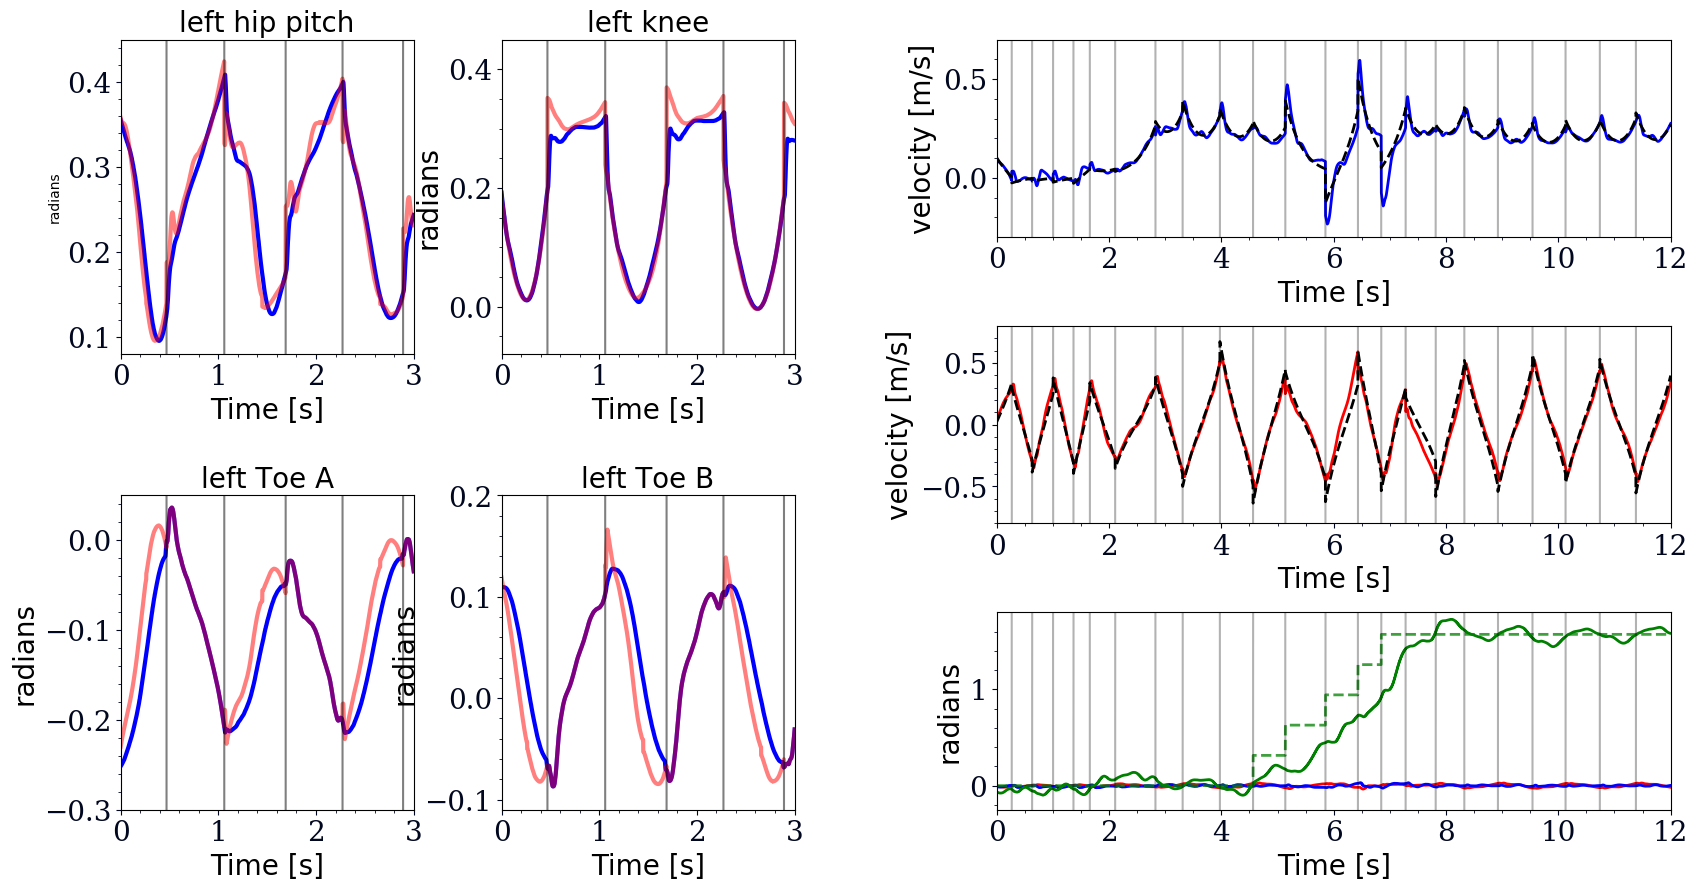

In [53]:
# combined
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
fig = plt.figure(constrained_layout=True)
gs0 = fig.add_gridspec(1, 2)

fig.set_size_inches(20, 10)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)
# gs02 = gs0[2].subgridspec(3, 1)
# ax = fig.add_subplot(gs02[0:2])
# for a in range(2):
#     for b in range(2):
#         ax = fig.add_subplot(gs00[a, b])
#         # annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
#         if a == 1 and b == 1:
#             # ax.set_xlabel('xlabel')
# for a in range(3):
#     ax = fig.add_subplot(gs01[a])
#     # annotate_axes(ax, f'axRight[{a}, {b}]')
#     if a == 2:
#         # ax.set_ylabel('ylabel')

csfont = {'fontname':'Times New Roman'}


ax1 = fig.add_subplot(gs01[0])
ax2 = fig.add_subplot(gs01[1])
ax3 = fig.add_subplot(gs01[2])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax4 = fig.add_subplot(gs00[0, 0])
ax5 = fig.add_subplot(gs00[0, 1])
ax6 = fig.add_subplot(gs00[1, 0])
ax7 = fig.add_subplot(gs00[1, 1])

fig.subplots_adjust(hspace=0.45, wspace=0.3)
start = 42500
finish = 52000
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_LIP_d_0'][32000:50000], color='black', linestyle = '--', linewidth = 3);
# ax.plot(veldf['time_elapsed'][32000:50000], veldf['v_StB_Wpc_L_0'][32000:50000], color='blue', label = 'measured', linewidth = 3);
# ax.plot(veldf['time_elapsed'][20000:50000]+0.4, veldf['target_vel_0'][20000:50000], color='black', label = 'measured', linewidth = 2);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_0'][start:finish], color='blue', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_0'][start:finish], color='black', linestyle = '--', linewidth = 2);

ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_Wpc_L_1'][start:finish], color='red', label = 'measured', linewidth = 2);
# ax.plot(veldf['time_elapsed'][start:finish]+0.5-veldf['time_elapsed'][start], veldf['target_vel_0'][start:finish], color='black', label = 'measured', linewidth = 2);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['v_StB_LIP_d_1'][start:finish], color='black', linestyle = '--', linewidth = 2);




ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_0'][start:finish], color='red',linewidth = 2, label = 'roll');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start],veldf['base_orientation_1'][start:finish], color='blue',linewidth = 2, label = 'pitch');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['target_yaw'][start],linewidth = 2, color='green', label = 'yaw');
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 2, linestyle = '--', label = 'target yaw', alpha = 0.75);

# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['base_orientation_2'][start:finish]-veldf['base_orientation_2'][0],linewidth = 3, color='green', label = 'yaw');
# ax.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['target_yaw'][start:finish]-veldf['target_yaw'][start], color='green', linewidth = 3, linestyle = '--', label = 'target yaw', alpha = 0.75);
ax1.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax2.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
ax3.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.3);
# ax2.sharex(ax1)
# fig.suptitle("GridSpec")
ax1.set_ylim([-0.3,0.7])
ax2.set_ylim([-0.8,0.8])
ax3.set_ylim([-0.25,1.8])
ax1.set_xlim([0,12])
ax3.set_xlim([0,12])
ax2.set_xlim([0,12])
# format_axes(fig)


start = 32000
finish = 35000
ax4.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['position_full_2'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax4.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['pos_reference_2'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax4.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax4.set_ylim([0.08,0.45])


ax4.set_title('left hip pitch', **csfont, fontsize=20)
ax4.set_ylabel('radians', **csfont, fontsize=10)

ax5.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['position_full_3'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax5.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['pos_reference_3'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax5.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax5.set_ylim([-0.08,0.45])
ax5.set_title('left knee', **csfont,fontsize=20)
ax5.set_ylabel('radians',**csfont, fontsize=20)

ax6.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['position_full_4'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax6.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['pos_reference_4'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax6.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax6.set_ylim([-0.3,0.05])
ax6.set_title('left Toe A',**csfont, fontsize=20)
ax6.set_xlabel('Time [s]',**csfont, fontsize=20)

ax7.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['position_full_5'][start:finish], color='blue', label = 'measured', linewidth = 3);
ax7.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], veldf['pos_reference_5'][start:finish], color='red', label = 'reference', linewidth = 3, alpha = 0.5);
ax7.plot(veldf['time_elapsed'][start:finish]-veldf['time_elapsed'][start], (veldf['support_leg'][start:finish]-0.5)*5, color='black', alpha = 0.5);
ax7.set_ylim([-0.11,0.2])
ax7.set_title('left Toe B',**csfont, fontsize=20)
ax7.set_xlabel('Time [s]',**csfont, fontsize=20)
ax7.set_ylabel('radians',**csfont, fontsize=20)
ax6.set_ylabel('radians',**csfont, fontsize=20)
ax4.set_xlabel('Time [s]',**csfont, fontsize=20)
ax5.set_xlabel('Time [s]',**csfont, fontsize=20)
ax6.set_xlabel('Time [s]',**csfont, fontsize=20)
ax1.set_xlabel('Time [s]',**csfont, fontsize=20)
ax2.set_xlabel('Time [s]',**csfont, fontsize=20)
ax3.set_xlabel('Time [s]',**csfont, fontsize=20)
ax3.set_ylabel('radians',**csfont, fontsize=20)
ax4.set_xlim([0, 3])
ax5.set_xlim([0, 3])
ax6.set_xlim([0, 3])
ax7.set_xlim([0, 3])
ax1.set_ylabel('velocity [m/s]',**csfont, fontsize=20)
ax2.set_ylabel('velocity [m/s]',**csfont, fontsize=20)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax5.tick_params(axis='both', which='major', labelsize=20)
ax6.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)


# from turtle import color
# log_COM = np.loadtxt('/home/ashamsah3/catkin_ws/src/digit_main/src/config_files/log_ROM_COM_belief_with_switch1.txt')
# log_x_com = log_COM[:,0]
# log_y_com = log_COM[:,1]


# border = Rectangle((0,0), 6, 6, fc = "None", ec="black" )
# s_obs1 = Rectangle((0,0), 2, 3, fc = "red", ec="black", alpha = 0.4 )
# s_obs2 = Rectangle((4, 2), 1, 2, fc = "red", ec="black" , alpha = 0.4)

# ax.add_patch(border)
# ax.add_patch(s_obs1)
# ax.add_patch(s_obs2)

# shift_y = 3 - 0.19 #(veldf['waypoint_1'][10500]) + (veldf['waypoint_1'][10])
# shift_x = 5.5 - 0.04#(veldf['waypoint_0'][10500]) - (veldf['waypoint_0'][10])

# heading_offset = -np.pi/2 + veldf['base_orientation_2'][0]

# ax.plot(((veldf['p_WC_0'] )*np.cos(heading_offset) + (veldf['p_WC_1'])*np.sin(heading_offset)) + shift_x,  
#     -(veldf['p_WC_0'])*np.sin(heading_offset) + (veldf['p_WC_1'])*np.cos(heading_offset) +shift_y, color='green', label = 'COM_hardware');

# ax.plot((veldf_sim['p_WC_0'] ), (veldf_sim['p_WC_1']),   color='blue', label = 'COM_sim');

# ax.scatter(veldf['waypointPSP_0'][11000:86085], veldf['waypointPSP_1'][11000:86085], s=2,  color='black', label = 'waypoint');

# ax.plot(log_x_com,log_y_com, color='red', label = 'COM_PSP')

# ax.grid(True)
# ax.set_xticklabels([])
# ax.set_yticklabels([])

plt.savefig('hardware_data.svg')